In [2]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pycocotools.coco import COCO
import bbox_visualizer as bbv

In [83]:
image_root_dir = '/opt/ml/dataset/'
submission_paths = ['/opt/ml/level2_objectdetection_cv-level2-cv-17/filtered_ensemble8_with_wbf.csv']
color_palette = [
    (255, 0, 0),
    (0, 255, 0),
]
coco = COCO('/opt/ml/dataset/train_all.json')
classes = ["General trash", "Paper", "Paper pack", "Metal", "Glass", 
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]

loading annotations into memory...
Done (t=0.09s)
creating index...
index created!


In [84]:
submission_CSVs = [pd.read_csv(path) for path in submission_paths]

image_ids = submission_CSVs[0]['image_id'].tolist()

Index: test/0013.jpg
15
15


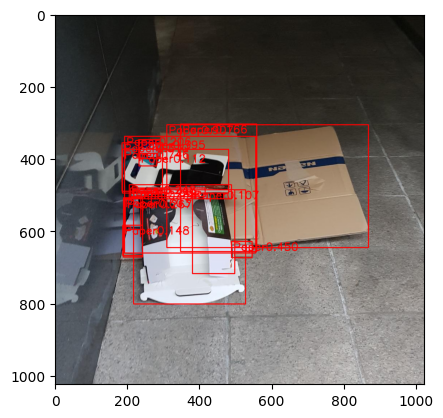

In [89]:
# index = np.random.randint(0, len(image_ids))
index = 13

print("Index: " + str(image_ids[index]))

image_path = os.path.join(image_root_dir, image_ids[index])
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

for i, submission in enumerate(submission_CSVs):
    predictions = str(submission['PredictionString'][index]).split()
    predictions = np.array(predictions, dtype=float)
    predictions = np.reshape(predictions, (-1, 6))
    print(len(predictions))

    labels_list = []
    predictions_list = []
    num = 0
    for pred in predictions:
        if pred[1] > 0.1:
            labels_list.append(
                classes[int(pred[0])] + str(f"{pred[1]:.3f}")
            )

            prediction_list = [
                int(pred[2]), int(pred[3]), int(pred[4]), int(pred[5])
            ]
            predictions_list.append(prediction_list)
            num += 1
        
        image = bbv.bbox_visualizer.add_multiple_labels(
            image,
            labels_list,
            predictions_list,
            text_bg_color=color_palette[i],
            text_color=color_palette[i],
            draw_bg=False,
            top=False,
        )
        image = bbv.bbox_visualizer.draw_multiple_rectangles(
            image,
            predictions_list,
            bbox_color=color_palette[i],
            thickness=2,
        )
    print(num)

plt.imshow(image)

In [87]:
index = 13

print("Index: " + str(image_ids[index]))

image_path = os.path.join(image_root_dir, image_ids[index])
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

for i, submission in enumerate(submission_CSVs):
    predictions = str(submission['PredictionString'][index]).split()
    predictions = np.array(predictions, dtype=float)
    predictions = np.reshape(predictions, (-1, 6))
    print(len(predictions))

    labels_list = []
    predictions_list = []
    num = 0
    for pred in predictions:
        if pred[1] > 0.1:
            labels_list.append(
                classes[int(pred[0])] + str(f"{pred[1]:.3f}")
            )

            prediction_list = [
                int(pred[2]), int(pred[3]), int(pred[4]), int(pred[5])
            ]
            predictions_list.append(prediction_list)
            num += 1
        
        image = bbv.bbox_visualizer.add_multiple_labels(
            image,
            labels_list,
            predictions_list,
            text_bg_color=color_palette[i],
            text_color=color_palette[i],
            draw_bg=False,
            top=False,
        )
        image = bbv.bbox_visualizer.draw_multiple_rectangles(
            image,
            predictions_list,
            bbox_color=color_palette[i],
            thickness=2,
        )
    print(num)

Index: test/0013.jpg
15
15


In [76]:
submission_path = '/opt/ml/level2_objectdetection_cv-level2-cv-17/ensemble8.csv'
submission_CSV = pd.read_csv(submission_path)

predictions_list = []
filtered_list = []

for i in range(len(submission_CSV)):
    predictions = str(submission_CSV['PredictionString'][i]).split()
    predictions = np.array(predictions, dtype=float)
    predictions = np.reshape(predictions, (-1, 6))
    predictions_list.append(len(predictions))
    
    num = 0
    for pred in predictions:
        if pred[1] > 0.1:
            num += 1
    filtered_list.append(num)

In [77]:
print(np.mean(predictions_list), np.mean(filtered_list))

79.8193389447752 7.068774378977623


In [49]:
infer_df

,image_id,class_id,conf_score,x_min,y_min,x_max,y_max
0,NaN,7.0,0.999911,218.622650,47.840855,460.298126,479.927338
1,NaN,7.0,0.999864,604.360291,518.743652,953.075134,1023.962952
2,NaN,7.0,0.999829,117.151146,423.781464,332.782227,712.599121
3,NaN,7.0,0.998558,642.075684,327.823883,877.057556,621.636475
4,NaN,7.0,0.998525,391.550354,193.094009,601.379761,547.575439
...,...,...,...,...,...,...,...
230,NaN,7.0,0.001493,416.936890,562.263428,452.615540,694.849976
231,NaN,7.0,0.001477,445.288635,548.855896,596.735168,796.718689
232,NaN,7.0,0.001466,127.142853,428.981903,185.158813,504.967682
233,NaN,1.0,0.001442,328.046570,640.587769,352.604614,685.229858


In [44]:


fig = px.histogram(infer_df.image_id.value_counts(), 
                   log_y=True, color_discrete_sequence=['indianred'], opacity=0.7,
                   labels={"value":"Number of Annotations Per Image"},
                   title="<b>DISTRIBUTION OF # OF ANNOTATIONS PER IMAGE   " \
                         "<i><sub>(Log Scale for Y-Axis)</sub></i></b>",
                   )
fig.update_layout(showlegend=False,
                  xaxis_title="<b>Number of Unique Images</b>",
                  yaxis_title="<b>Count of All Object Annotations</b>",)
fig.show()